# Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [4]:
# Importing data frame
total_df = pd.read_csv('iris.csv')
total_df.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [5]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


# Data visualization

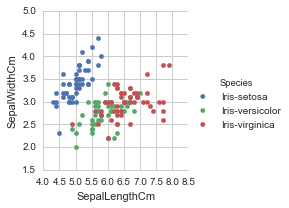

In [6]:
# total_df.plot(kind='Scatter', x='SepalLengthCm', y='SepalWidthCm')
sns.FacetGrid(total_df, hue='Species')\
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

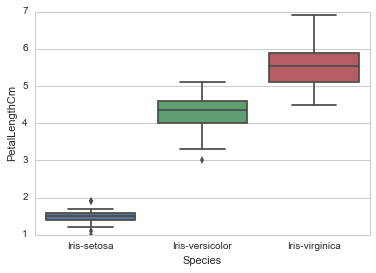

In [7]:
# Other example
sns.boxplot(x='Species', y='PetalLengthCm', data=total_df)

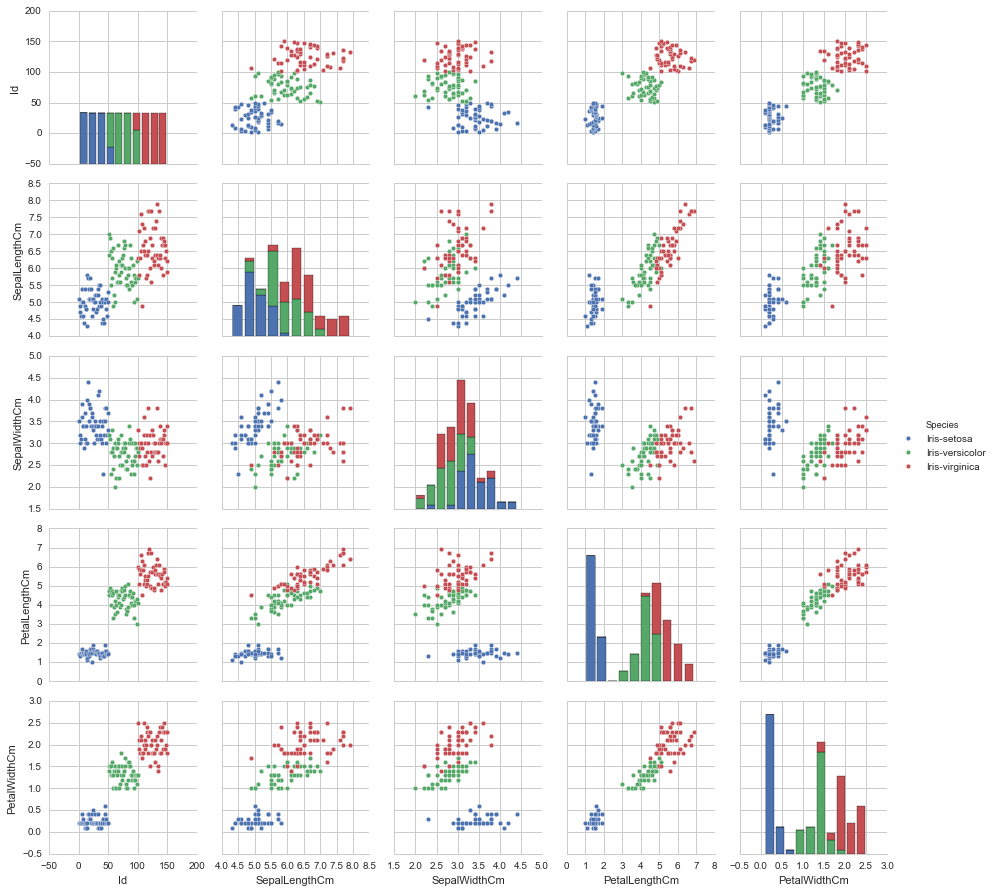

In [8]:
# Pair plotting
sns.pairplot(total_df, hue="Species")

# Classification using kNN methods

In [37]:
df = total_df.drop("Id", axis=1)
y_df = df["Species"].values
x_df = df.drop("Species", axis=1).values

kfold = KFold(n_splits=5, shuffle=True)
kfold.get_n_splits(df)

knns = [KNeighborsClassifier(n_neighbors=i) for i in range(2, 20)]
results = []
for knn in knns:
    res = []
    for train_index, valid_index in kfold.split(df):
        x_train, y_train = x_df[train_index], y_df[train_index]
        x_valid, y_valid = x_df[valid_index], y_df[valid_index]
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_valid)
        res.append(accuracy_score(y_valid, y_pred))
    results.append(res)
results = np.array(results)

best_index = np.argmax(results)
n_nei = 2 + best_index
print('Best number of neighbors for this method : ', n_nei)
print('associated mean accuracy score : ', results[n_nei])

Best number of neighbors for this method :  4
associated mean accuracy score :  [ 0.9         0.96666667  1.          0.96666667  0.93333333]


In [36]:
k_nn_final = KNeighborsClassifier(n_neighbors=n_nei)
k_nn_final.fit(x_df, y_df)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')